# **Recovery Status Data - Exploratory Data Analysis**

*Recovery status is measured using several tests and metrics to inform recovery strategies throughout the season.
This dataset contains simulated data for 1 player.*

This notebook is organized in the following sections:

* [Part 0 - Preliminary Steps](#0)
    * [Part 0.1 - Importing the Necessary Libraries](#0.1)
    * [Part 0.2 - Reading the Recovery Status Data Dataset](#0.2)

* [Part 1 - Data Cleaning/Wrangling](#1)
    * [Part 1.1 - Preliminary Analysis of the Dataset](#1.1)
    * [Part 1.2 - Dealing with Duplicates](#1.2)
    * [Part 1.3 - Ensuring Correct Data Types](#1.3)
    * [Part 1.4 - Dealing with Null/Missing Values](#1.4)
    * [Part 1.5 - Final Checks](#1.5)

* [Part 2 - Exploratory Data Analysis](#2)

---

<a id='0'></a>
## Part 0 - Preliminary Steps

<a id='0.1'></a>
### Part 0.1 - Importing the Necessary Libraries

In [1]:
import pandas as pd

<a id='0.2'></a>
### Part 0.2 - Reading the Recovery Status Data Dataset

In [2]:
recovery_status_data = pd.read_csv('CFC Recovery status Data (1).csv')

---

<a id='1'></a>
## Part 1 - Data Cleaning/Wrangling

<a id='1.1'></a>
### Part 1.1 - Preliminary Analysis of the Dataset

Each row represents a category with an associated metric, except for rows with the `emboss_baseline_score` (it is a pre-calculated aggregated “total” category that represents the overall recovery score). Therefore for each day there are 13 rows, as there are 6 categories, 2 metrics as well as the overall recovery score.

In [3]:
#Note for self --> in feature engineering can create a new row from the metric row that just has the values completeness and composite.

In [3]:
recovery_status_data.head(24)

,sessionDate,seasonName,metric,category,value
0,02/07/2023,2023/2024,bio_baseline_completeness,bio,0.0
1,02/07/2023,2023/2024,bio_baseline_composite,bio,NaN
2,02/07/2023,2023/2024,emboss_baseline_score,total,NaN
3,02/07/2023,2023/2024,msk_joint_range_baseline_completeness,msk_joint_range,0.0
4,02/07/2023,2023/2024,msk_joint_range_baseline_composite,msk_joint_range,NaN
5,02/07/2023,2023/2024,msk_load_tolerance_baseline_completeness,msk_load_tolerance,0.0
6,02/07/2023,2023/2024,msk_load_tolerance_baseline_composite,msk_load_tolerance,NaN
7,02/07/2023,2023/2024,sleep_baseline_completeness,sleep,0.0
8,02/07/2023,2023/2024,sleep_baseline_composite,sleep,NaN
9,02/07/2023,2023/2024,soreness_baseline_completeness,soreness,0.0


In [4]:
recovery_status_data.tail(24)

,sessionDate,seasonName,metric,category,value
8049,12/03/2025,2024/2025,emboss_baseline_score,total,-0.012167
8050,12/03/2025,2024/2025,msk_joint_range_baseline_completeness,msk_joint_range,0.000000
8051,12/03/2025,2024/2025,msk_joint_range_baseline_composite,msk_joint_range,NaN
8052,12/03/2025,2024/2025,msk_load_tolerance_baseline_completeness,msk_load_tolerance,0.000000
8053,12/03/2025,2024/2025,msk_load_tolerance_baseline_composite,msk_load_tolerance,NaN
8054,12/03/2025,2024/2025,sleep_baseline_completeness,sleep,0.806452
8055,12/03/2025,2024/2025,sleep_baseline_composite,sleep,-0.020800
8056,12/03/2025,2024/2025,soreness_baseline_completeness,soreness,0.048387
8057,12/03/2025,2024/2025,soreness_baseline_composite,soreness,-0.100000
8058,12/03/2025,2024/2025,subjective_baseline_completeness,subjective,0.806452


The recovery status data dataset has 8073 rows and 5 columns, with only the `values`column having null/missing values.

In [5]:
recovery_status_data.shape

(8073, 5)

In [6]:
recovery_status_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8073 entries, 0 to 8072
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sessionDate  8073 non-null   object 
 1   seasonName   8073 non-null   object 
 2   metric       8073 non-null   object 
 3   category     8073 non-null   object 
 4   value        5261 non-null   float64
dtypes: float64(1), object(4)
memory usage: 315.5+ KB


<a id='1.2'></a>
### Part 1.2 - Dealing with Duplicates

We checked if there were any duplicate rows. We found there were no duplicate rows.

In [7]:
recovery_status_data.duplicated().any()

False

In [8]:
# Another check for duplicates - just in case
recovery_status_data.duplicated().sum()

0

<a id='1.3'></a>
### Part 1.3 - Ensuring Correct Data Types

Next, we proceeded to ensure whether the data types of all columns were correct/adequate

In [9]:
recovery_status_data.dtypes

sessionDate     object
seasonName      object
metric          object
category        object
value          float64
dtype: object

Given the only column with the incorrect data type was the `sessionDate` (i.e., date) column, we proceeded to transform it to the correct format --> datetime format (%d/%m/%Y).

In [10]:
# Transforming the columns into the correct data type

## Transforming the sessionDate column into datetime format
recovery_status_data['sessionDate'] = pd.to_datetime(recovery_status_data['sessionDate'], format = '%d/%m/%Y')

In [11]:
recovery_status_data.dtypes

sessionDate    datetime64[ns]
seasonName             object
metric                 object
category               object
value                 float64
dtype: object

<a id='1.4'></a>
### Part 1.4 - Dealing with Null/Missing Values

There are approximately 2800 null values in the `value` column, which represents nearly 35% of all values. Null values means that the data was not collected for a specific metric on that particular date. 

In [12]:
recovery_status_data.isna().sum()

sessionDate       0
seasonName        0
metric            0
category          0
value          2812
dtype: int64

In [13]:
(recovery_status_data.isna().sum() / len(recovery_status_data)) * 100

sessionDate     0.000000
seasonName      0.000000
metric          0.000000
category        0.000000
value          34.832157
dtype: float64

In [14]:
#want just rows with the overall recovery score
emboss = recovery_status_data[recovery_status_data['metric'] == 'emboss_baseline_score']
emboss['value'].isna().sum()
#There are about 250 rows without the total recovery score.
#Not sure what to do with this? if just to drop it or to keep it and impute using the values from the day before

250

In [15]:
#14 May 18:26 Note --> maybe only need to keep overall recovery score --> then merge with gps and check if null values coincide with rest days and matchdays. Then see how to deal with in feature engineering

<a id='1.5'></a>
### Part 1.5 - Final Checks

In [16]:
#Extra tests

In [15]:
total_metric = recovery_status_data[recovery_status_data['category'] == 'total']

In [16]:
total_metric.head(50)

,sessionDate,seasonName,metric,category,value
2,2023-07-02,2023/2024,emboss_baseline_score,total,NaN
15,2023-07-03,2023/2024,emboss_baseline_score,total,NaN
28,2023-07-04,2023/2024,emboss_baseline_score,total,0.000000
41,2023-07-05,2023/2024,emboss_baseline_score,total,0.000000
54,2023-07-06,2023/2024,emboss_baseline_score,total,0.000000
67,2023-07-07,2023/2024,emboss_baseline_score,total,-0.180000
80,2023-07-08,2023/2024,emboss_baseline_score,total,0.000000
93,2023-07-09,2023/2024,emboss_baseline_score,total,NaN
106,2023-07-10,2023/2024,emboss_baseline_score,total,0.196667
119,2023-07-11,2023/2024,emboss_baseline_score,total,0.000000


<a id='2'></a>
## Part 2 - Exploratory Data Analysis

In [17]:
recovery_status_data['sessionDate'].min()

Timestamp('2023-07-02 00:00:00')

Recovery status data timespan --> July 2023 - March 2025

GPS data timespan -->A ugust 2022 - April 2025

In [18]:
recovery_status_data['sessionDate'].max()

Timestamp('2025-03-13 00:00:00')

In [19]:
# Create a new column 'metric_type' with the suffix after the last underscore
recovery_status_data['metric_type'] = recovery_status_data['metric'].str.split('_').str[-1]

In [20]:
recovery_status_data

,sessionDate,seasonName,metric,category,value,metric_type
0,2023-07-02,2023/2024,bio_baseline_completeness,bio,0.000000,completeness
1,2023-07-02,2023/2024,bio_baseline_composite,bio,NaN,composite
2,2023-07-02,2023/2024,emboss_baseline_score,total,NaN,score
3,2023-07-02,2023/2024,msk_joint_range_baseline_completeness,msk_joint_range,0.000000,completeness
4,2023-07-02,2023/2024,msk_joint_range_baseline_composite,msk_joint_range,NaN,composite
...,...,...,...,...,...,...
8068,2025-03-13,2024/2025,sleep_baseline_composite,sleep,-0.232500,composite
8069,2025-03-13,2024/2025,soreness_baseline_completeness,soreness,0.000000,completeness
8070,2025-03-13,2024/2025,soreness_baseline_composite,soreness,NaN,composite
8071,2025-03-13,2024/2025,subjective_baseline_completeness,subjective,0.129032,completeness


In [21]:
completeness_metic = recovery_status_data[recovery_status_data['metric_type'] == 'completeness']

In [22]:
completeness_metic['value'].value_counts()

value
0.000000    2562
0.032258     126
0.064516      87
0.096774      52
0.354839      49
            ... 
0.358974       1
0.140625       1
0.623656       1
0.537634       1
0.215054       1
Name: count, Length: 116, dtype: int64

In [23]:
# Filter for only 'completeness' rows where value is 0 (i.e. test not performed)
incomplete_entries = recovery_status_data[
    (recovery_status_data['metric_type'] == 'completeness') & 
    (recovery_status_data['value'] == 0)
]

# OR drop those rows to keep only valid data
recovery_status_data_cleaned = recovery_status_data[
    ~((recovery_status_data['metric_type'] == 'completeness') & 
      (recovery_status_data['value'] == 0))
]


In [ ]:
#Dataset Overview

print("Shape:", recovery_status_data.shape)
print("Column names:", recovery_status_data.columns.tolist())

print("\nPreview:")
print(recovery_status_data.head())


Shape: (8073, 6)
Column names: ['sessionDate', 'seasonName', 'metric', 'category', 'value', 'metric_type']

Preview:
  sessionDate seasonName                                 metric  \
0  2023-07-02  2023/2024              bio_baseline_completeness   
1  2023-07-02  2023/2024                 bio_baseline_composite   
2  2023-07-02  2023/2024                  emboss_baseline_score   
3  2023-07-02  2023/2024  msk_joint_range_baseline_completeness   
4  2023-07-02  2023/2024     msk_joint_range_baseline_composite   

          category  value   metric_type  
0              bio    0.0  completeness  
1              bio    NaN     composite  
2            total    NaN         score  
3  msk_joint_range    0.0  completeness  
4  msk_joint_range    NaN     composite  


In [ ]:
print("\nData types:")
print(recovery_status_data.dtypes)

print("\nMissing values:")
print(recovery_status_data.isnull().sum())

print("\nDuplicate rows:", recovery_status_data.duplicated().sum())



Data types:
sessionDate    datetime64[ns]
seasonName             object
metric                 object
category               object
value                 float64
metric_type            object
dtype: object

Missing values:
sessionDate       0
seasonName        0
metric            0
category          0
value          2812
metric_type       0
dtype: int64

Duplicate rows: 0


In [ ]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")


In [ ]:
#Overview

print("Dataset shape:", recovery_status_data.shape)
print("Columns:", recovery_status_data.columns.tolist())
print("\nPreview:")
print(recovery_status_data.head())


Dataset shape: (8073, 6)
Columns: ['sessionDate', 'seasonName', 'metric', 'category', 'value', 'metric_type']

Preview:
  sessionDate seasonName                                 metric  \
0  2023-07-02  2023/2024              bio_baseline_completeness   
1  2023-07-02  2023/2024                 bio_baseline_composite   
2  2023-07-02  2023/2024                  emboss_baseline_score   
3  2023-07-02  2023/2024  msk_joint_range_baseline_completeness   
4  2023-07-02  2023/2024     msk_joint_range_baseline_composite   

          category  value   metric_type  
0              bio    0.0  completeness  
1              bio    NaN     composite  
2            total    NaN         score  
3  msk_joint_range    0.0  completeness  
4  msk_joint_range    NaN     composite  


In [31]:
print("\nMissing values:")
print(recovery_status_data.isnull().sum())

print("\nDuplicate rows:", recovery_status_data.duplicated().sum())

# Subset to use only valid 'value' rows
recovery_nonnull = recovery_status_data.dropna(subset=['value'])



Missing values:
sessionDate       0
seasonName        0
metric            0
category          0
value          2812
metric_type       0
dtype: int64

Duplicate rows: 0


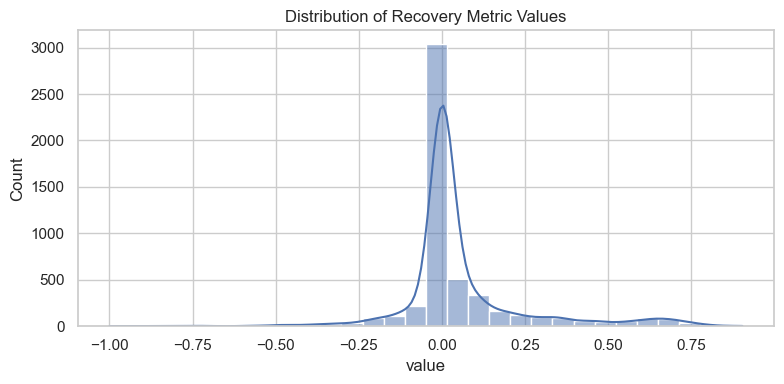

In [32]:
if not recovery_nonnull.empty:
    plt.figure(figsize=(8, 4))
    sns.histplot(recovery_nonnull['value'], kde=True, bins=30)
    plt.title("Distribution of Recovery Metric Values")
    plt.xlabel("value")
    plt.tight_layout()
    plt.show()
else:
    print("No valid values in 'value' column for distribution analysis.")


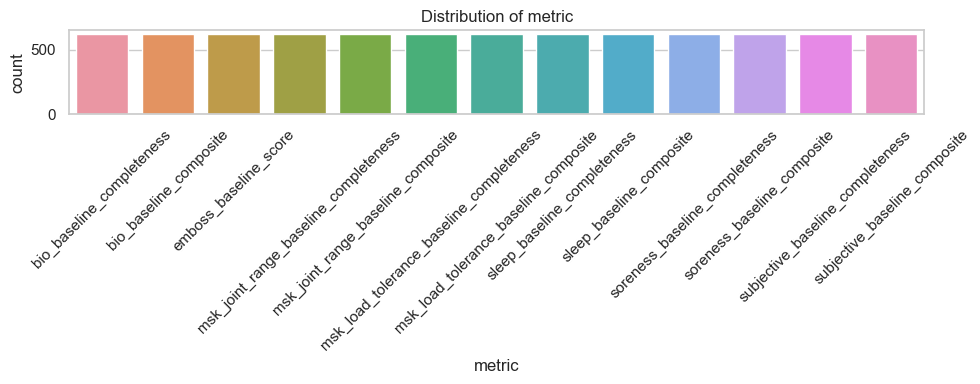

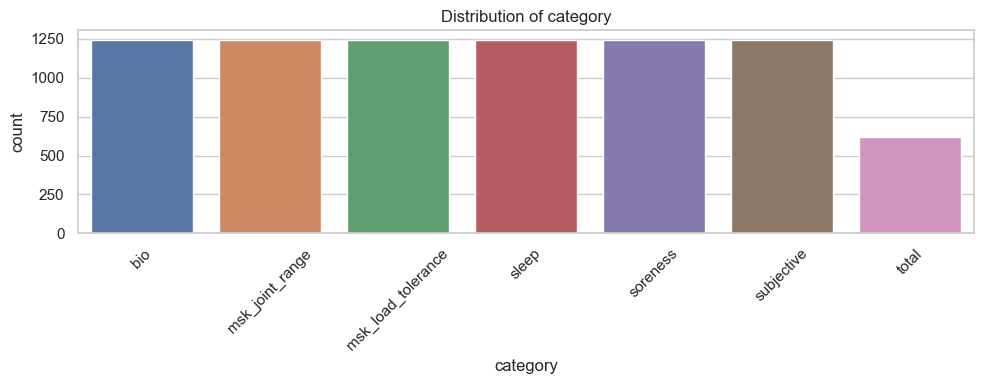

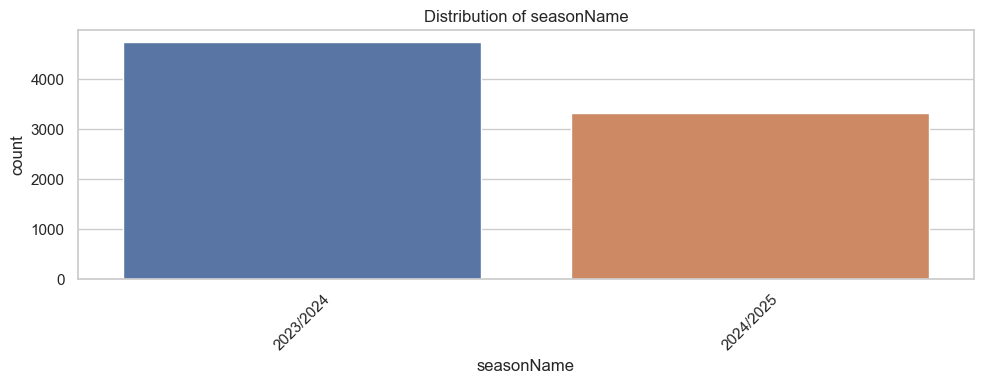

In [33]:
for col in ['metric', 'category', 'seasonName']:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=recovery_status_data, x=col, order=recovery_status_data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


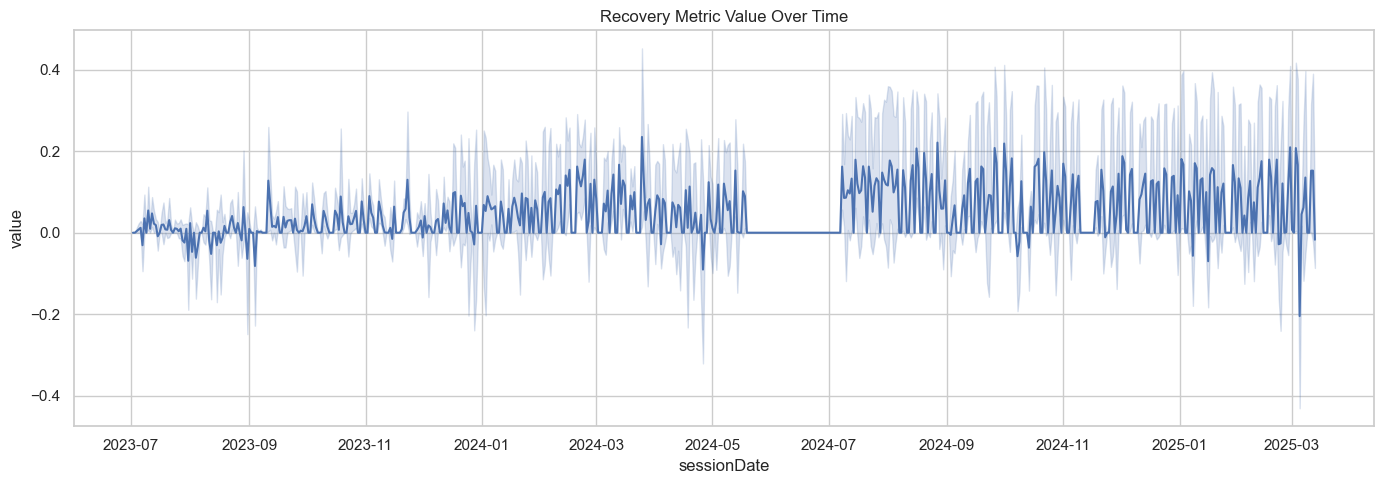

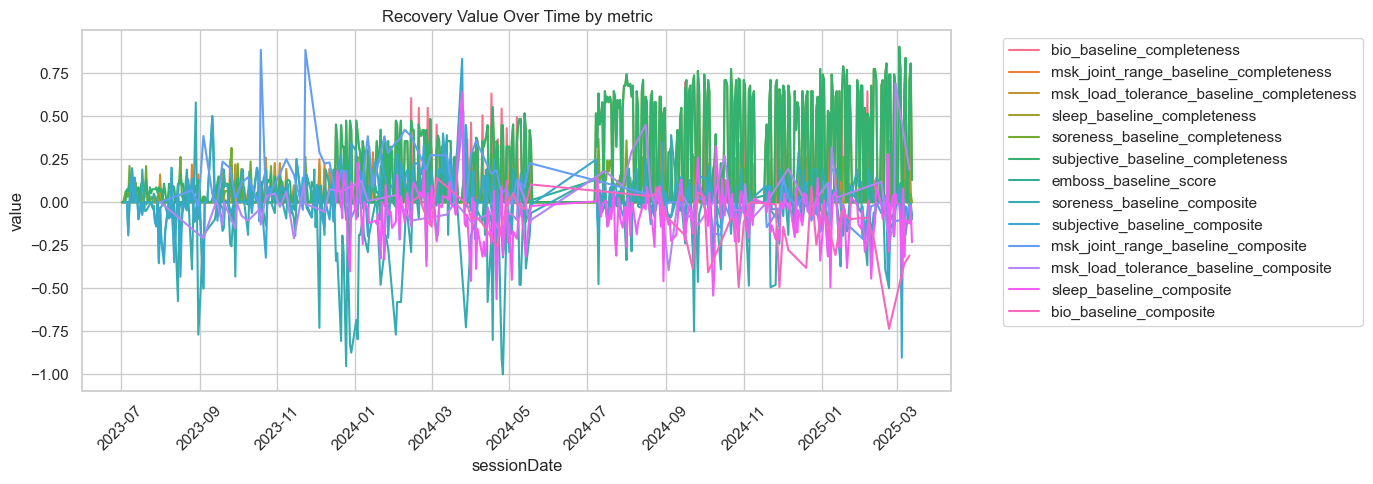

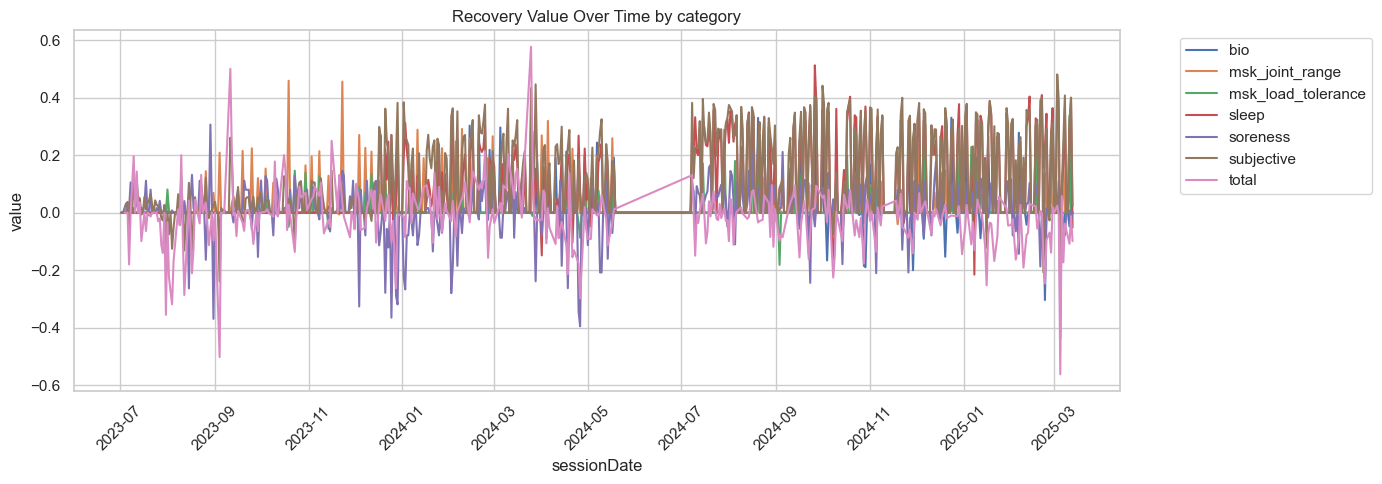

In [34]:
if not recovery_nonnull.empty:
    plt.figure(figsize=(14, 5))
    sns.lineplot(data=recovery_nonnull, x='sessionDate', y='value')
    plt.title("Recovery Metric Value Over Time")
    plt.ylabel("value")
    plt.tight_layout()
    plt.show()

    for col in ['metric', 'category']:
        plt.figure(figsize=(14, 5))
        sns.lineplot(data=recovery_nonnull, x='sessionDate', y='value', hue=col, errorbar=None)
        plt.title(f"Recovery Value Over Time by {col}")
        plt.xticks(rotation=45)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()


In [35]:
if not recovery_nonnull.empty:
    grouped_summary = recovery_nonnull.groupby(['seasonName', 'metric', 'category'])['value'] \
        .agg(['count', 'mean', 'std', 'min', 'max']) \
        .sort_values(by='count', ascending=False)

    print("Top metric/category/season combinations by count:")
    print(grouped_summary.head(10))
else:
    print("No valid 'value' entries for grouped summary.")



Top metric/category/season combinations by count:
                                                                        count  \
seasonName metric                                   category                    
2023/2024  bio_baseline_completeness                bio                   365   
           subjective_baseline_completeness         subjective            365   
           msk_joint_range_baseline_completeness    msk_joint_range       365   
           msk_load_tolerance_baseline_completeness msk_load_tolerance    365   
           sleep_baseline_completeness              sleep                 365   
           soreness_baseline_completeness           soreness              365   
2024/2025  subjective_baseline_completeness         subjective            256   
           soreness_baseline_completeness           soreness              256   
           sleep_baseline_completeness              sleep                 256   
           msk_load_tolerance_baseline_completeness msk_loa